## Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('headlines.csv', header=None)
df

,0
0,Budget to set scene for election\n \n Gordon B...
1,Army chiefs in regiments decision\n \n Militar...
2,Howard denies split over ID cards\n \n Michael...
3,Observers to monitor UK election\n \n Minister...
4,Kilroy names election seat target\n \n Ex-chat...
...,...
2220,India opens skies to competition\n \n India wi...
2221,Yukos bankruptcy 'not US matter'\n \n Russian ...
2222,Survey confirms property slowdown\n \n Governm...
2223,High fuel prices hit BA's profits\n \n British...


In [3]:
print(df.iloc[1,:].values[0])

Army chiefs in regiments decision
 
 Military chiefs are expected to meet to make a final decision on the future of Scotland's Army regiments.
 
 A committee of the Army Board, which is made up of the most senior defence figures, will discuss plans for restructuring regiments on Monday. The proposals include cutting Scotland's six single-battalion regiments to five and merging these into a super regiment. The plans have faced stiff opposition from campaigners and politicians alike. The committee's decision must be ratified by Defence Secretary Geoff Hoon and Prime Minister Tony Blair. It is expected that it will be made public next week. When ministers announced a reorganisation of the Army it drew a question mark over the futures of the Black Watch, the Kings Own Scottish Borderers, the Royal Scots, the Royal Highland Fusiliers and the Argyll and Sutherland Highlanders. In October, the Council of Scottish Colonels proposed the merger of the Royal Scots and the King's Own Scottish Bord

In [4]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

In [5]:
swords = stopwords.words('english')
wnl = WordNetLemmatizer()

In [6]:
def lemmatize(word):
    tag = pos_tag([word])
    pos='n'
    if tag[0][1].startswith('N'):
        pos = 'n'
    elif tag[0][1].startswith('V'):
        pos = 'v'
    elif tag[0][1].startswith('R'):
        pos = 'r'
    elif tag[0][1].startswith('J'):
        pos = 'a'
    
    return wnl.lemmatize(word, pos=pos)

In [7]:
lemmatize('the')

'the'

In [8]:
def clean_txt(sent):
    tokens1 = word_tokenize(sent)  # Step-1. Tokenize the text
    tokens2 = [token for token in tokens1 if token.isalnum()]  # Step-2 Remove the punctuations
    tokens3 = [token.lower() for token in tokens2 if token.lower() not in swords]  # Step-3 Remove stopwords
    tokens4 = [lemmatize(token) for token in tokens3]  # step-4 Remove the suffixes
    return tokens4 

In [9]:
sent = 'Hello friends! How are you? I like Python Programming.'

In [10]:
clean_txt(sent)

['hello', 'friend', 'like', 'python', 'program']

## TF*IDF Vectorizer

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
df[0]

0       Budget to set scene for election\n \n Gordon B...
1       Army chiefs in regiments decision\n \n Militar...
2       Howard denies split over ID cards\n \n Michael...
3       Observers to monitor UK election\n \n Minister...
4       Kilroy names election seat target\n \n Ex-chat...
                              ...                        
2220    India opens skies to competition\n \n India wi...
2221    Yukos bankruptcy 'not US matter'\n \n Russian ...
2222    Survey confirms property slowdown\n \n Governm...
2223    High fuel prices hit BA's profits\n \n British...
2224    US trade gap hits record in 2004\n \n The gap ...
Name: 0, Length: 2225, dtype: object

In [12]:
tf = TfidfVectorizer(analyzer=clean_txt)

In [13]:
X_new = tf.fit_transform(df[0])

In [14]:
X_new

<2225x22483 sparse matrix of type '<class 'numpy.float64'>'
	with 319728 stored elements in Compressed Sparse Row format>

## Create the clusters

In [15]:
from sklearn.cluster import KMeans

In [16]:
km = KMeans(random_state=0)

In [17]:
km.fit_predict(X_new)

c:\Users\kunal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 5, 1, ..., 3, 3, 3])

In [18]:
set(km.labels_)

{0, 1, 2, 3, 4, 5, 6, 7}

In [19]:
km.inertia_   # Sum of squared errors 

2066.5523475217005

## Elbow Method

In [20]:
sse = []
for k in range(1,16):
    km = KMeans(n_clusters=k,random_state=0)
    km.fit_predict(X_new)
    sse.append(km.inertia_)

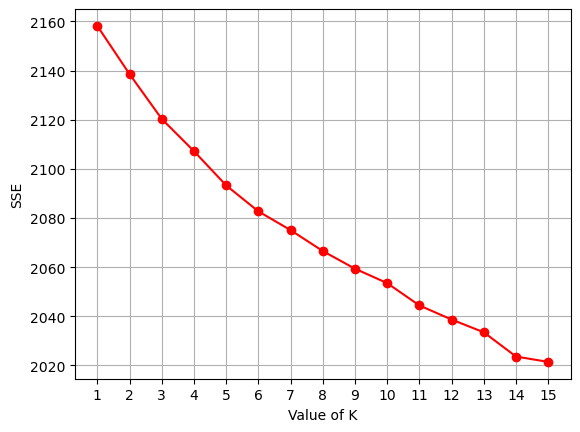

In [21]:
plt.xlabel('Value of K')
plt.ylabel('SSE')
plt.grid()
plt.xticks(range(1, 16))
plt.plot(range(1,16),sse,marker='o',color='r')

In [22]:
km = KMeans(n_clusters=5, random_state=0, n_init='auto')

In [23]:
labels = km.fit_predict(X_new)

In [24]:
labels

array([3, 4, 3, ..., 1, 1, 1])

## Seperate the clusters

In [25]:
zero = df[labels == 0]
one = df[labels == 1]
two = df[labels == 2]
three = df[labels == 3]
four = df[labels == 4]

In [26]:
zero

,0
964,Half-Life 2 sweeps Bafta awards\n \n PC first ...
1017,'Ultimate game' award for Doom 3\n \n Sci-fi s...
1055,BBC leads interactive Bafta wins\n \n The BBC ...
1301,UK pioneers digital film network\n \n The worl...
1311,'Ultimate game' award for Doom 3\n \n Sci-fi s...
...,...
1709,Prodigy join V Festival line-up\n \n Essex act...
1710,Boogeyman takes box office lead\n \n The low-b...
1712,Deal to ban 'homophobic' reggae\n \n The regga...
1713,Richard and Judy choose top books\n \n The 10 ...


In [27]:
print("'Cluster-0:", len(zero))
print("'Cluster-1:", len(one))
print("'Cluster-2:", len(two))
print("'Cluster-3:", len(three))
print("'Cluster-4:", len(four))

'Cluster-0: 314
'Cluster-1: 334
'Cluster-2: 535
'Cluster-3: 301
'Cluster-4: 741


## Wordcloud

### First Cluster

In [28]:
from wordcloud import WordCloud

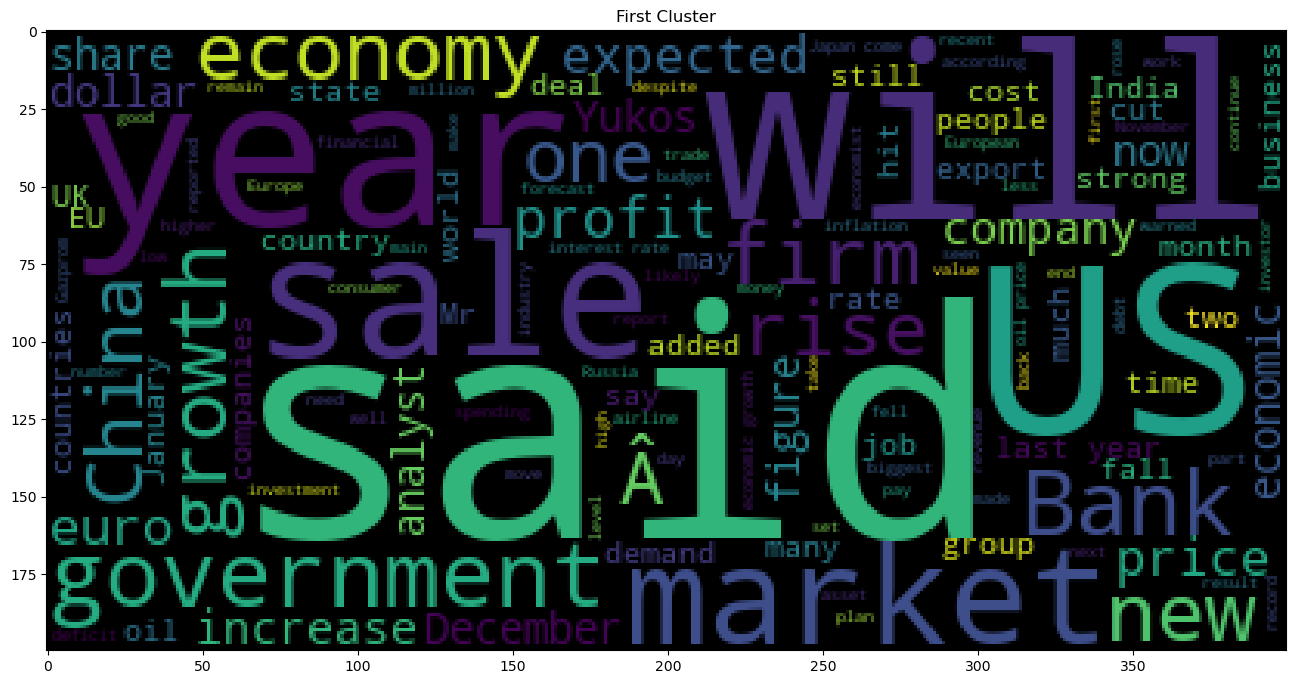

In [29]:
wc = WordCloud().generate(' '.join(one[0]))
plt.figure(figsize=(16,9))
plt.title('First Cluster')
plt.imshow(wc);

In [30]:
swords = stopwords.words('english')

In [31]:
from nltk import FreqDist
new = ' '.join(one[0])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist(clean)
freq.most_common(10)

[('said', 1132),
 ('US', 607),
 ('year', 546),
 ('growth', 355),
 ('economy', 348),
 ('market', 298),
 ('also', 292),
 ('would', 290),
 ('Mr', 279),
 ('government', 273)]

### Second cluster

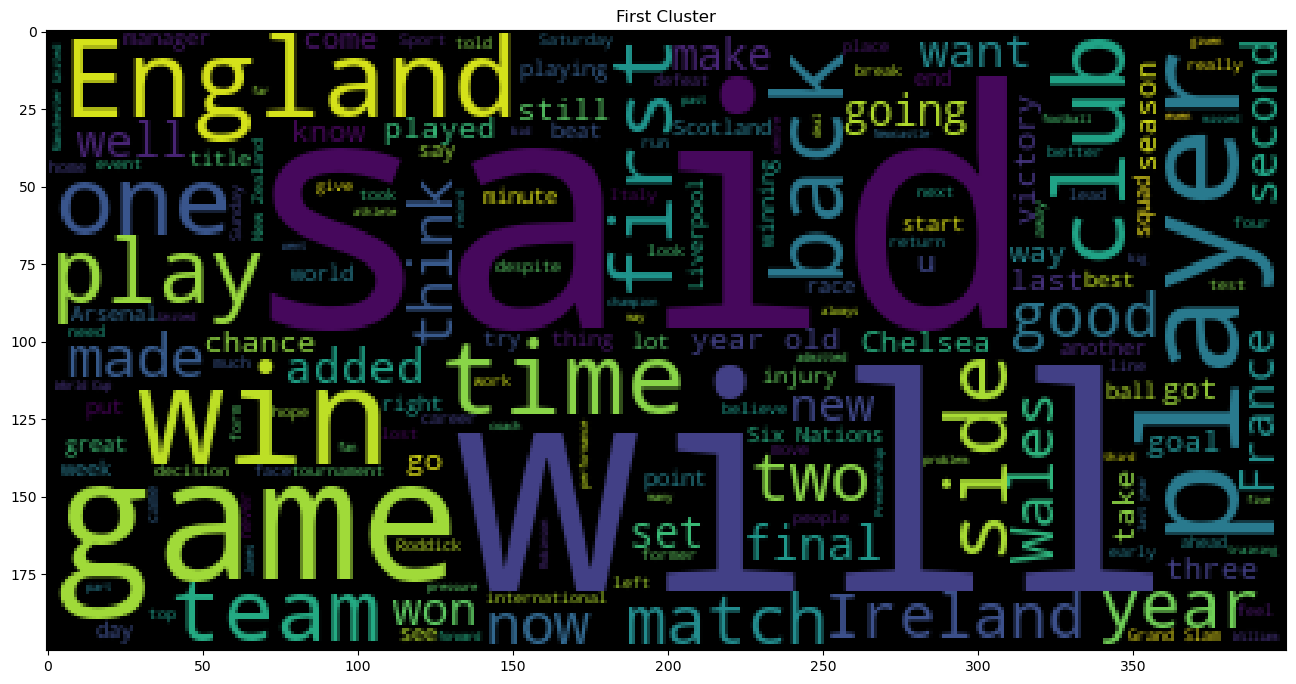

In [32]:
wc = WordCloud().generate(' '.join(two[0]))
plt.figure(figsize=(16,9))
plt.title('First Cluster')
plt.imshow(wc);

In [33]:
new = ' '.join(two[0])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist(clean)
freq.most_common(10)

[('said', 998),
 ('game', 550),
 ('England', 464),
 ('first', 442),
 ('would', 440),
 ('win', 417),
 ('last', 386),
 ('time', 366),
 ('two', 354),
 ('also', 352)]

### Zeroth Cluster

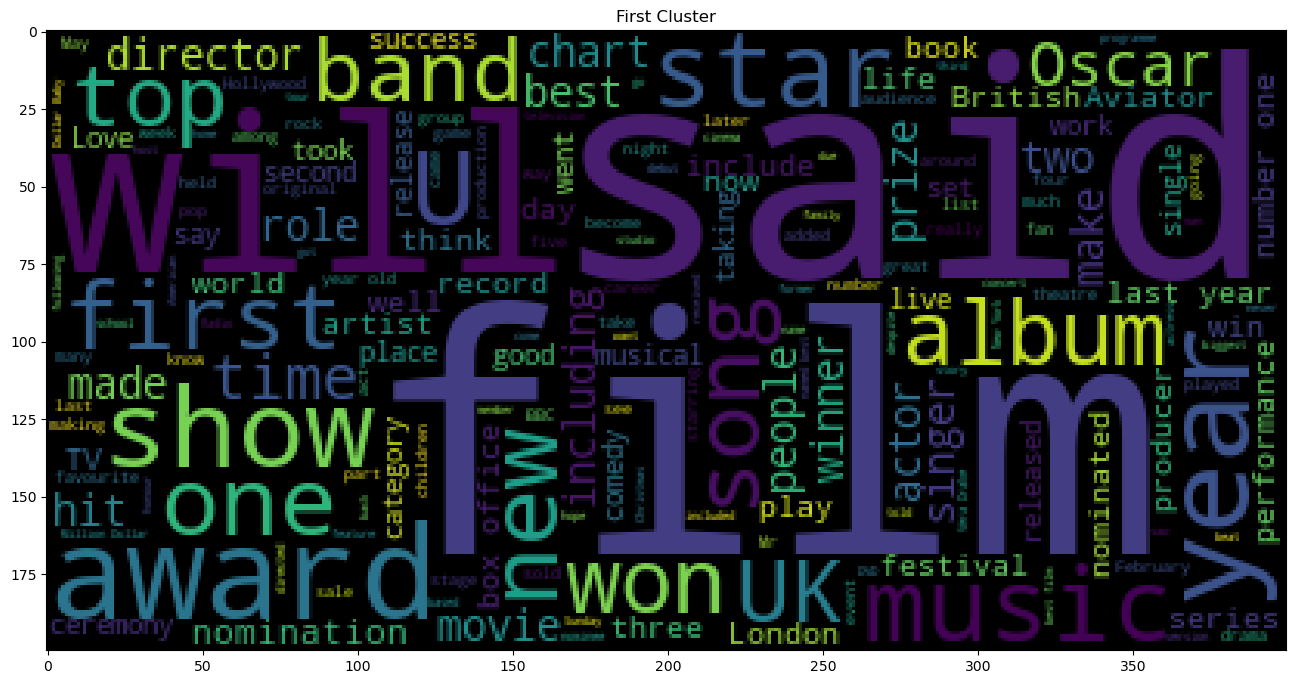

In [34]:
wc = WordCloud().generate(' '.join(zero[0]))
plt.figure(figsize=(16,9))
plt.title('First Cluster')
plt.imshow(wc);

In [35]:
new = ' '.join(zero[0])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist(clean)
freq.most_common(10)

[('film', 652),
 ('said', 581),
 ('best', 564),
 ('also', 318),
 ('year', 312),
 ('music', 282),
 ('one', 246),
 ('US', 241),
 ('show', 223),
 ('first', 218)]

###  Third Cluster

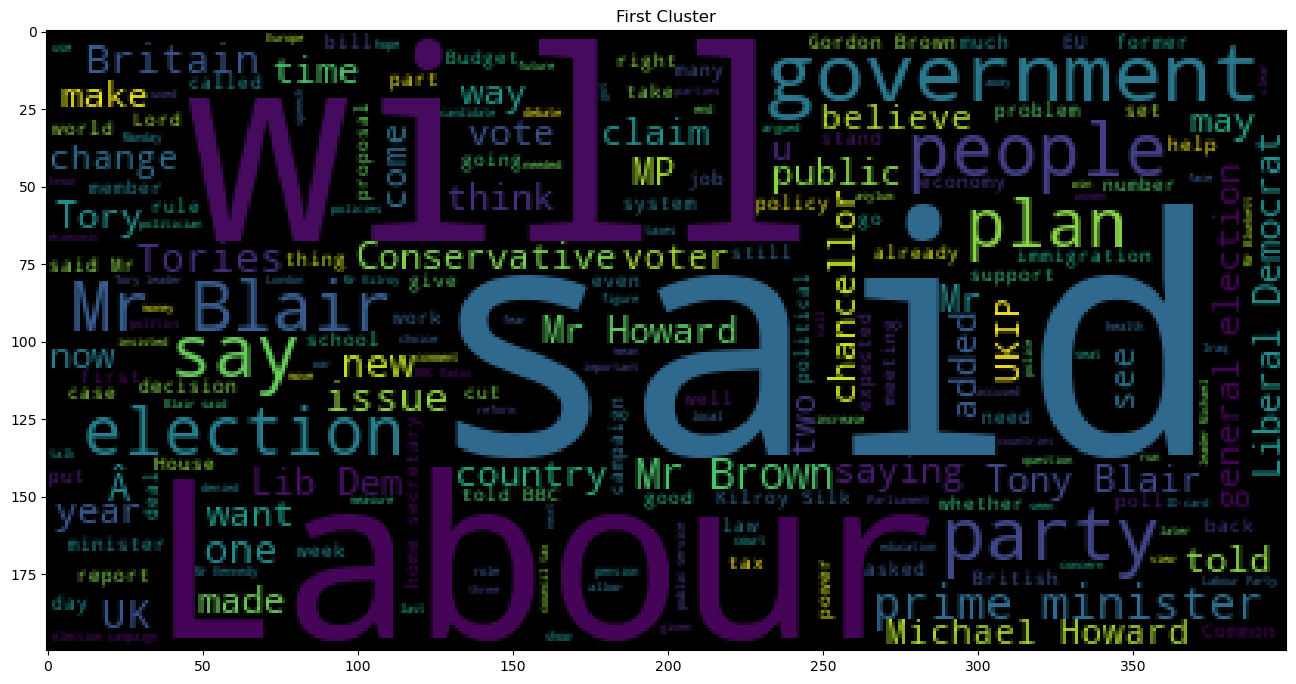

In [36]:
wc = WordCloud().generate(' '.join(three[0]))
plt.figure(figsize=(16,9))
plt.title('First Cluster')
plt.imshow(wc);

In [37]:
new = ' '.join(three[0])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist(clean)
freq.most_common(10)

[('said', 1668),
 ('Mr', 1550),
 ('would', 862),
 ('Labour', 730),
 ('Blair', 563),
 ('government', 550),
 ('election', 547),
 ('people', 442),
 ('party', 413),
 ('Brown', 381)]

### Fourth Cluster

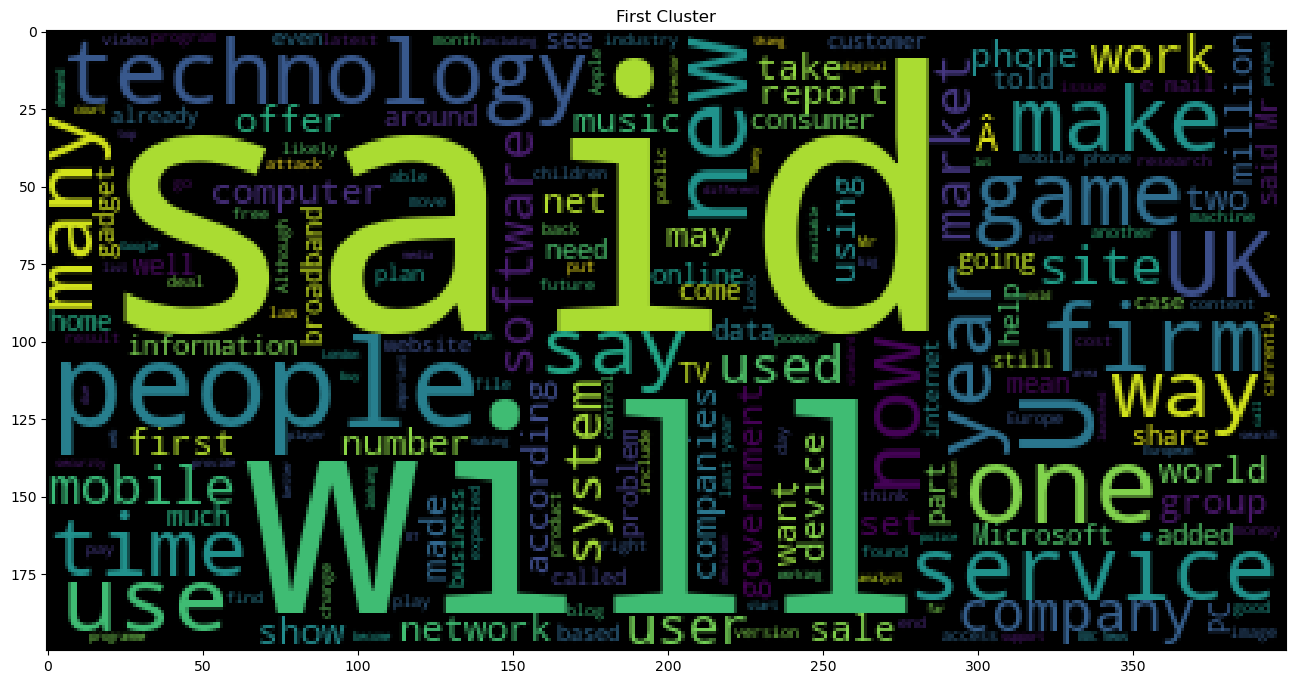

In [38]:
wc = WordCloud().generate(' '.join(four[0]))
plt.figure(figsize=(16,9))
plt.title('First Cluster')
plt.imshow(wc);

In [39]:
new = ' '.join(four[0])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist(clean)
freq.most_common(10)

[('said', 2865),
 ('people', 1106),
 ('Mr', 962),
 ('would', 876),
 ('also', 791),
 ('new', 694),
 ('could', 684),
 ('US', 602),
 ('one', 556),
 ('year', 500)]